In [1]:
#cswURL='http://test.ands.org.au:8080/geonetwork/srv/eng/csw'
cswURL='https://ecat.ga.gov.au/geonetwork/srv/eng/csw'

In [2]:
# Get CSW Capabilities
import requests
myfile = open('capabilities.XML', 'w') 
r= requests.get(cswURL +'?SERVICE=CSW&VERSION=2.0.2&REQUEST=GetCapabilities')
print(r.text)
myfile.write(r.text)
myfile.close()

<?xml version="1.0" encoding="UTF-8"?>
<csw:Capabilities xmlns:csw="http://www.opengis.net/cat/csw/2.0.2" xmlns:gml="http://www.opengis.net/gml" xmlns:gmd="http://www.isotc211.org/2005/gmd" xmlns:ows="http://www.opengis.net/ows" xmlns:ogc="http://www.opengis.net/ogc" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="2.0.2" xsi:schemaLocation="http://www.opengis.net/cat/csw/2.0.2 http://schemas.opengis.net/csw/2.0.2/CSW-discovery.xsd">
  <ows:ServiceIdentification>
    <ows:Title />
    <ows:Abstract />
    <ows:Keywords>
      <!-- Keywords are automatically added by GeoNetwork
            according to catalogue content. -->
      <ows:Keyword>geoscientificInformation</ows:Keyword>
      <ows:Keyword>Earth Sciences</ows:Keyword>
      <ows:Keyword>GA Publication</ows:Keyword>
      <ows:Keyword>imageryBaseMapsEarthCover</ows:Keyword>
      <ows:Keyword>NCI</ows:Keyword>
      <ows:Keyword>Topology</ows:Keyword>
      <ows:Keyword>

In [3]:
# Get list of formats
import requests
headers = {'Content-Type': 'application/xml'}
xml="""<csw:GetDomain xmlns:csw="http://www.opengis.net/cat/csw/2.0.2"
               service="CSW" version="2.0.2">
  <csw:PropertyName>Format</csw:PropertyName>
</csw:GetDomain>"""

print (requests.post(cswURL, data=xml, headers=headers).text)

<?xml version="1.0" encoding="UTF-8"?>
<csw:GetDomainResponse xmlns:csw="http://www.opengis.net/cat/csw/2.0.2">
  <csw:DomainValues type="csw:Record">
    <csw:PropertyName>Format</csw:PropertyName>
    <csw:ListOfValues>
      <csw:Value>AEM</csw:Value>
      <csw:Value>AS2482</csw:Value>
      <csw:Value>All formats combined</csw:Value>
      <csw:Value>ArcGIS</csw:Value>
      <csw:Value>ArcGIS Grid</csw:Value>
      <csw:Value>ArcGIS-coverage</csw:Value>
      <csw:Value>ArcGIS-grid</csw:Value>
      <csw:Value>Ascii XYZ</csw:Value>
      <csw:Value>Ascii xyz</csw:Value>
      <csw:Value>Basemap</csw:Value>
      <csw:Value>Caris Csar</csw:Value>
      <csw:Value>Caris csar</csw:Value>
      <csw:Value>DOI</csw:Value>
      <csw:Value>Digital Object Identifier</csw:Value>
      <csw:Value>Download</csw:Value>
      <csw:Value>ESRI Geoprocessing Service</csw:Value>
      <csw:Value>ESRI Image Service</csw:Value>
      <csw:Value>ESRI Map Service</csw:Value>
      <csw:Value>ESRI Map

In [2]:
### Print out all URLS
import requests, xmltodict, pprint
headers = {'Content-Type': 'application/xml'}
xml="""<csw:GetRecords xmlns:csw="http://www.opengis.net/cat/csw/2.0.2" 
xmlns:ogc="http://www.opengis.net/ogc" service="CSW" version="2.0.2" resultType="results"
startPosition="1" maxRecords="100" outputFormat="application/xml"
outputSchema="http://www.opengis.net/cat/csw/2.0.2"
xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
xsi:schemaLocation="http://www.opengis.net/cat/csw/2.0.2
http://schemas.opengis.net/csw/2.0.2/CSW-discovery.xsd">
  <csw:Query typeNames="csw:Record">
    <csw:ElementSetName>full</csw:ElementSetName>
    <csw:Query typeNames="gmd:MD_Metadata">
    <csw:Constraint version="1.1.0">
      <Filter xmlns="http://www.opengis.net/ogc">
        <PropertyIsLike wildCard="%" singleChar="_" escapeChar="\">
              <PropertyName>Format</PropertyName>
              <Literal>NetCDF</Literal>
        </PropertyIsLike>
      </Filter>
    </csw:Constraint>
</csw:Query>
  </csw:Query>
</csw:GetRecords>
"""

#cswURL='http://test.ands.org.au:8080/geonetwork/srv/eng/csw'
cswURL='https://ecat.ga.gov.au/geonetwork/srv/eng/csw'
r=requests.post(cswURL, data=xml, headers=headers)
myfile = open('queryResults.XML', 'w') 
myfile.write(r.text)
myfile.close()

p = xmltodict.parse(r.text)

import pprint
pp = pprint.PrettyPrinter(indent=1)
myfile = open('queryResults.npy', 'w') 
myfile.write(pp.pformat(p))
myfile.close()

q=p['csw:GetRecordsResponse']['csw:SearchResults']['csw:Record']
for r in q:
    keyURL='dc:URI'
    if 'dc:URI' in r:
        #pp.pprint(r['dc:URI'])
        if isinstance(r['dc:URI'],dict):
            pp.pprint(r['dc:URI']['#text'])
        if isinstance(r['dc:URI'], list):
            for url in r['dc:URI']:
                pp.pprint(url['#text'])

'http://dx.doi.org/10.4225/25/58a43e0383c90'
'file:///g/data1/rr2/airborne_geophysics/NT/P599/radiometrics/uranium/grid/rNT0599u/rNT0599u.nc'
'http://dapds00.nci.org.au/thredds/catalog/rr2/airborne_geophysics/NT/P599/radiometrics/uranium/grid/rNT0599u/catalog.html?dataset=rr2-Airborne/NT/P599/radiometrics/uranium/grid/rNT0599u/rNT0599u.nc'
'http://dapds00.nci.org.au/thredds/ncss/rr2/airborne_geophysics/NT/P599/radiometrics/uranium/grid/rNT0599u/rNT0599u.nc/dataset.html'
'http://dapds00.nci.org.au/thredds/fileServer/rr2/airborne_geophysics/NT/P599/radiometrics/uranium/grid/rNT0599u/rNT0599u.nc'
'http://dapds00.nci.org.au/thredds/fileServer/rr2/airborne_geophysics/http/NT/P599/radiometrics/uranium/grid/rNT0599u/rNT0599u.ers.zip'
'http://dapds00.nci.org.au/thredds/dodsC/rr2/airborne_geophysics/NT/P599/radiometrics/uranium/grid/rNT0599u/rNT0599u.nc.html'
'http://dapds00.nci.org.au/thredds/wcs/rr2/airborne_geophysics/NT/P599/radiometrics/uranium/grid/rNT0599u/rNT0599u.nc'
'http://dapds00.nc

In [3]:
url = "http://dapds00.nci.org.au/thredds/dodsC/rr2/airborne_geophysics/NT/P599/radiometrics/uranium/grid/rNT0599u/rNT0599u.nc"
import netCDF4 as nc

ds = nc.Dataset(url)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    GDAL: GDAL 1.11.1, released 2014/09/24
    survey_id: 599
    ecat_id: 107229
    geospatial_lon_min: 128.9945
    geospatial_lon_resolution: 0.001
    geospatial_lat_max: -19.9965
    geospatial_bounds_crs: GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
    geospatial_lat_min: -22.0045
    geospatial_lat_resolution: 0.001
    geospatial_lat_units: degrees
    geospatial_lon_units: degrees
    geospatial_bounds: POLYGON((128.9969 -22.0045, 128.9951 -22.0035, 128.9954 -20.7348, 128.9966 -20.7332, 131.4950 -19.9981, 132.0015 -19.9971, 132.0025 -19.9989, 131.4952 -20.7347, 128.9969 -22.0045))
    geospatial_lon_max: 13

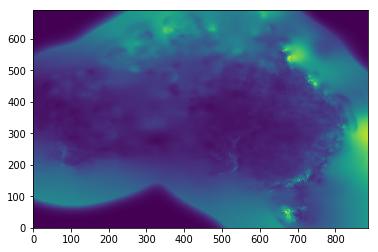

In [4]:
import netCDF4 as nc
import matplotlib.pyplot as plt

%matplotlib inline

# url = "http://opendap.bom.gov.au:8080/thredds/dodsC/agcd/precip/total/r005/01day/1908/precip_total_r005_19080102_19080102.nc"
url = "http://opendap.bom.gov.au:8080/thredds/dodsC/agcd/precip/total/r005/12month/2017/precip_total_r005_20160701_20170630.nc"
ds = nc.Dataset(url)

plt.pcolormesh(ds['precip'][0,:,:])